## Moodle 학습 플랫폼 실습


In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('logs_20231030-1511.csv')
df

,Time,User full name,Affected user,Event context,Component,Event name,Description,Origin,IP address
0,"30/10/23, 15:11:02",Admin Lms,-,System,Logs,Log report viewed,The user with id '2' viewed the log report for...,web,0:0:0:0:0:0:0:1
1,"30/10/23, 15:10:25",-,-,Site home,System,Course viewed,The user with id '0' viewed the course with id...,web,0:0:0:0:0:0:0:1
2,"30/10/23, 15:10:25",Rick Gentle,-,System,System,User logged out,The user with id '5' has logged out.,web,0:0:0:0:0:0:0:1
3,"30/10/23, 15:10:21",Rick Gentle,-,Course: 자바 기초,System,Course viewed,The user with id '5' viewed the course with id...,web,0:0:0:0:0:0:0:1
4,"30/10/23, 15:10:19",Rick Gentle,Rick Gentle,URL: 학습분석 위키페이지,System,Course activity completion updated,The user with id '5' updated the completion st...,web,0:0:0:0:0:0:0:1
...,...,...,...,...,...,...,...,...,...
1596,"30/10/23, 12:33:21",Admin Lms,-,System,System,Config log created,The user with id '2' changed the config settin...,web,0:0:0:0:0:0:0:1
1597,"30/10/23, 12:33:21",Admin Lms,-,System,System,Config log created,The user with id '2' changed the config settin...,web,0:0:0:0:0:0:0:1
1598,"30/10/23, 12:33:17",Admin Lms,Admin Lms,User: Admin Lms,System,User updated,The user with id '2' updated the profile for t...,web,0:0:0:0:0:0:0:1
1599,"30/10/23, 12:33:17",Admin Lms,Admin Lms,User: Admin Lms,System,User password updated,The user with id '2' changed their password.,web,0:0:0:0:0:0:0:1


In [11]:
# 컬럼명 확인

df.columns

Index(['Time', 'User full name', 'Affected user', 'Event context', 'Component',
       'Event name', 'Description', 'Origin', 'IP address'],
      dtype='object')

In [12]:
## 컬럼명을 변경한다. 분석 편의를 위해
df.columns = ['time', 'user_name', 'target_user', 'event_context', 'component', 'event_name', 'description', 'origin', 'ip_address']



In [14]:
df.describe()

,time,user_name,target_user,event_context,component,event_name,description,origin,ip_address
count,1601,1601,1601,1601,1601,1601,1601,1601,1601
unique,331,5,5,20,9,40,1378,1,1
top,"30/10/23, 12:33:28",Admin Lms,-,System,System,Config log created,The user with id '2' viewed the course with id...,web,0:0:0:0:0:0:0:1
freq,143,1380,1509,1248,1454,1189,24,1601,1601


In [15]:
df['user_name'].unique()

array(['Admin Lms', '-', 'Rick Gentle', 'Learn Second', 'Learner First'],
      dtype=object)

In [16]:
df['event_context'].unique()

array(['System', 'Site home', 'Course: 자바 기초', 'URL: 학습분석 위키페이지',
       'Page: 자바의 개요', 'Forum: 자유게시판', 'Forum: 공지사항', 'User: Rick Gentle',
       'Course: 파이썬 기초', 'User: Learn Second', 'User: Learner First',
       'Choice: 함수의 개념 사전 학습 설문', 'User: Admin Lms',
       'Forum: Announcements', 'URL: 파이썬의 역사', 'Category: 인공지능융복합',
       'Category: 4차산업혁명특별강좌', 'Category: 전공선택', 'Other',
       'Category: 전공필수'], dtype=object)

In [17]:
df['event_name'].unique()

array(['Log report viewed', 'Course viewed', 'User logged out',
       'Course activity completion updated', 'Course module viewed',
       'Tour ended', 'Tour started', 'My courses viewed',
       'Dashboard viewed', 'User has logged in', 'Discussion viewed',
       'Discussion subscription created', 'Post created',
       'Some content has been posted.', 'Grade user report viewed',
       'Discussion created', 'User profile viewed', 'Role assigned',
       'User enrolled in course', 'User list viewed', 'User created',
       'Course module created', 'Course module updated',
       'Grade item updated', 'Grade item created',
       'Course section updated', 'Message viewed', 'Message sent',
       'Email failed to send', 'Choice answer added',
       'Grader report viewed', 'Course updated',
       'Enrolment instance created', 'Course section created',
       'Course created', 'Category created', 'Category deleted',
       'Config log created', 'User updated', 'User password updated'

In [80]:
df2 = df[(df.user_name != 'Admin Lms') & (df.user_name != '-')]

df2

,time,user_name,target_user,event_context,component,event_name,description,origin,ip_address
2,"30/10/23, 15:10:25",Rick Gentle,-,System,System,User logged out,The user with id '5' has logged out.,web,0:0:0:0:0:0:0:1
3,"30/10/23, 15:10:21",Rick Gentle,-,Course: 자바 기초,System,Course viewed,The user with id '5' viewed the course with id...,web,0:0:0:0:0:0:0:1
4,"30/10/23, 15:10:19",Rick Gentle,Rick Gentle,URL: 학습분석 위키페이지,System,Course activity completion updated,The user with id '5' updated the completion st...,web,0:0:0:0:0:0:0:1
5,"30/10/23, 15:09:27",Rick Gentle,-,URL: 학습분석 위키페이지,URL,Course module viewed,The user with id '5' viewed the 'url' activity...,web,0:0:0:0:0:0:0:1
6,"30/10/23, 15:09:25",Rick Gentle,-,Course: 자바 기초,System,Course viewed,The user with id '5' viewed the course with id...,web,0:0:0:0:0:0:0:1
...,...,...,...,...,...,...,...,...,...
290,"30/10/23, 13:30:38",Learner First,Learner First,User: Learner First,System,User profile viewed,The user with id '3' viewed the profile for th...,web,0:0:0:0:0:0:0:1
291,"30/10/23, 13:30:33",Learner First,-,Course: 파이썬 기초,User tours,Tour ended,The user with id '3' has ended the tour with i...,web,0:0:0:0:0:0:0:1
292,"30/10/23, 13:30:27",Learner First,-,Course: 파이썬 기초,User tours,Tour started,The user with id '3' has started the tour with...,web,0:0:0:0:0:0:0:1
293,"30/10/23, 13:30:27",Learner First,-,Course: 파이썬 기초,System,Course viewed,The user with id '3' viewed the course with id...,web,0:0:0:0:0:0:0:1


In [81]:
m = df2['event_name'].apply(lambda x: 'viewed' in x)
cs = df2[m]

In [82]:
cs = cs.groupby('user_name').agg('event_name').count()

<Axes: xlabel='user_name'>

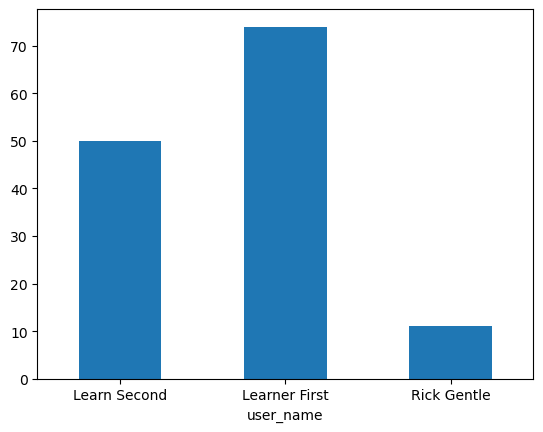

In [83]:

cs.plot.bar(x='name',y='view_count',rot=0)

In [108]:
from datetime import datetime
datetime.strptime('30/10/23, 13:30:27', '%d/%m/%y, %H:%M:%S')

datetime.datetime(2023, 10, 30, 13, 30, 27)

In [109]:
df2['timestamp'] = df2['time'].apply(lambda x: datetime.strptime(x, '%d/%m/%y, %H:%M:%S'))

C:\Users\user\AppData\Local\Temp\ipykernel_6184\1112131466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['timestamp'] = df2['time'].apply(lambda x: datetime.strptime(x, '%d/%m/%y, %H:%M:%S'))


In [111]:
df2

,time,user_name,target_user,event_context,component,event_name,description,origin,ip_address,timestamp
2,"30/10/23, 15:10:25",Rick Gentle,-,System,System,User logged out,The user with id '5' has logged out.,web,0:0:0:0:0:0:0:1,2023-10-30 15:10:25
3,"30/10/23, 15:10:21",Rick Gentle,-,Course: 자바 기초,System,Course viewed,The user with id '5' viewed the course with id...,web,0:0:0:0:0:0:0:1,2023-10-30 15:10:21
4,"30/10/23, 15:10:19",Rick Gentle,Rick Gentle,URL: 학습분석 위키페이지,System,Course activity completion updated,The user with id '5' updated the completion st...,web,0:0:0:0:0:0:0:1,2023-10-30 15:10:19
5,"30/10/23, 15:09:27",Rick Gentle,-,URL: 학습분석 위키페이지,URL,Course module viewed,The user with id '5' viewed the 'url' activity...,web,0:0:0:0:0:0:0:1,2023-10-30 15:09:27
6,"30/10/23, 15:09:25",Rick Gentle,-,Course: 자바 기초,System,Course viewed,The user with id '5' viewed the course with id...,web,0:0:0:0:0:0:0:1,2023-10-30 15:09:25
...,...,...,...,...,...,...,...,...,...,...
290,"30/10/23, 13:30:38",Learner First,Learner First,User: Learner First,System,User profile viewed,The user with id '3' viewed the profile for th...,web,0:0:0:0:0:0:0:1,2023-10-30 13:30:38
291,"30/10/23, 13:30:33",Learner First,-,Course: 파이썬 기초,User tours,Tour ended,The user with id '3' has ended the tour with i...,web,0:0:0:0:0:0:0:1,2023-10-30 13:30:33
292,"30/10/23, 13:30:27",Learner First,-,Course: 파이썬 기초,User tours,Tour started,The user with id '3' has started the tour with...,web,0:0:0:0:0:0:0:1,2023-10-30 13:30:27
293,"30/10/23, 13:30:27",Learner First,-,Course: 파이썬 기초,System,Course viewed,The user with id '3' viewed the course with id...,web,0:0:0:0:0:0:0:1,2023-10-30 13:30:27


In [112]:
for user in df2.user_name.unique():

    delta_list = []

    temp_df = df2.loc[df2['user_name']==user]

    time_list = temp_df['timestamp'].values

    for i in range(len(time_list)):

        if i != len(time_list)-1:

            delta = time_list[i+1] - time_list[i]

            print(type(delta))

            delta_list.append(delta.total_seconds())

    result.append(sum(time_list)/len(time_list))

result

<class 'numpy.timedelta64'>


AttributeError: 'numpy.timedelta64' object has no attribute 'total_seconds'